## Linear Regression with Normal equation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
X_data, y_data = datasets.fetch_openml('boston', return_X_y=True)

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X = X_data.values
y = y_data.values

In [6]:
X[:10]

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98],
       [0.02731, 0.0, 7.07, '0', 0.469, 6.421, 78.9, 4.9671, '2', 242.0,
        17.8, 396.9, 9.14],
       [0.02729, 0.0, 7.07, '0', 0.469, 7.185, 61.1, 4.9671, '2', 242.0,
        17.8, 392.83, 4.03],
       [0.03237, 0.0, 2.18, '0', 0.458, 6.998, 45.8, 6.0622, '3', 222.0,
        18.7, 394.63, 2.94],
       [0.06905, 0.0, 2.18, '0', 0.458, 7.147, 54.2, 6.0622, '3', 222.0,
        18.7, 396.9, 5.33],
       [0.02985, 0.0, 2.18, '0', 0.458, 6.43, 58.7, 6.0622, '3', 222.0,
        18.7, 394.12, 5.21],
       [0.08829, 12.5, 7.87, '0', 0.524, 6.012, 66.6, 5.5605, '5', 311.0,
        15.2, 395.6, 12.43],
       [0.14455, 12.5, 7.87, '0', 0.524, 6.172, 96.1, 5.9505, '5', 311.0,
        15.2, 396.9, 19.15],
       [0.21124, 12.5, 7.87, '0', 0.524, 5.631, 100.0, 6.0821, '5',
        311.0, 15.2, 386.63, 29.93],
       [0.17004, 12.5, 7.87, '0', 0.524, 6.004, 85.9, 6.5921, '5', 311.0,
        

In [7]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.33, random_state=42
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339,), (167,))

In [10]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [12]:
lr_ne.intercept_, lr_ne.coef_

(33.334975755636094,
 array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
        -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
         2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
        -5.47566338e-01]))

In [13]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [15]:
# RMSE
np.sqrt(((y_hat-y_true)**2).sum()/len(y_true))

4.552364598463058

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_true, y_pred=y_hat)
r2score = r2_score(y_true, y_pred=y_hat)

mse, r2score

(20.724023437339717, 0.7261570836552481)

Text(0.5, 1.0, 'Prices vs Predicted prices')

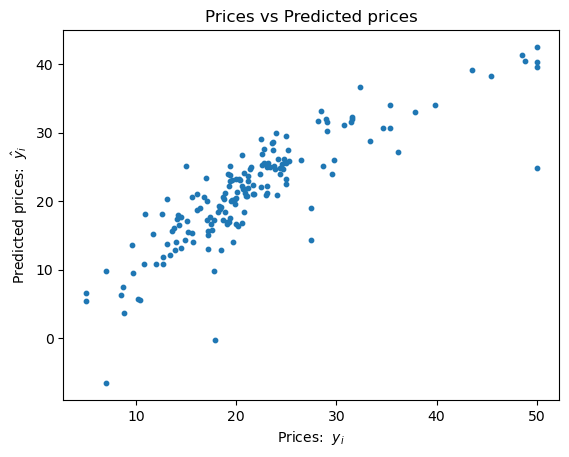

In [20]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices:  $y_i$")
plt.ylabel("Predicted prices:  $\hat{y}_i$")
plt.title("Prices vs Predicted prices")

## Linear Regression with SGD

In [21]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [23]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339,), (167,))

In [26]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [29]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [30]:
# RMSE
np.sqrt(((y_hat-y_true)**2).sum()/len(y_true))

89928822270842.23

In [31]:
mse = mean_squared_error(y_true, y_pred=y_hat)
r2score = r2_score(y_true, y_pred=y_hat)

mse, r2score

(8.08719307502073e+27, -1.0686247983663943e+26)

Text(0.5, 1.0, 'Prices vs Predicted prices')

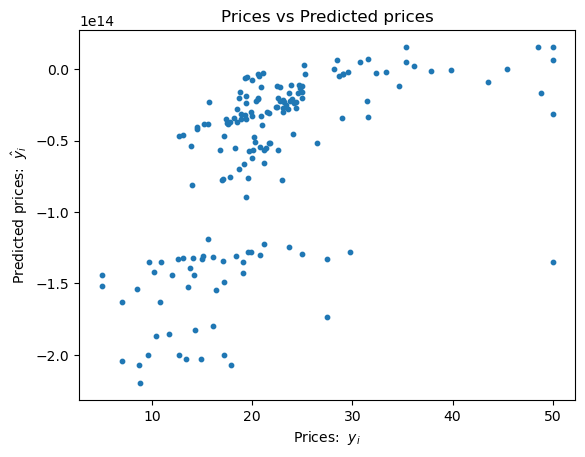

In [32]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices:  $y_i$")
plt.ylabel("Predicted prices:  $\hat{y}_i$")
plt.title("Prices vs Predicted prices")

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42
)

In [34]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [36]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [37]:
# RMSE
np.sqrt(((y_hat-y_true)**2).sum()/len(y_true))

4.600398972161203

In [38]:
mse = mean_squared_error(y_true, y_pred=y_hat)
r2score = r2_score(y_true, y_pred=y_hat)

mse, r2score

(21.163670703061857, 0.7203476765305956)

Text(0.5, 1.0, 'Prices vs Predicted prices')

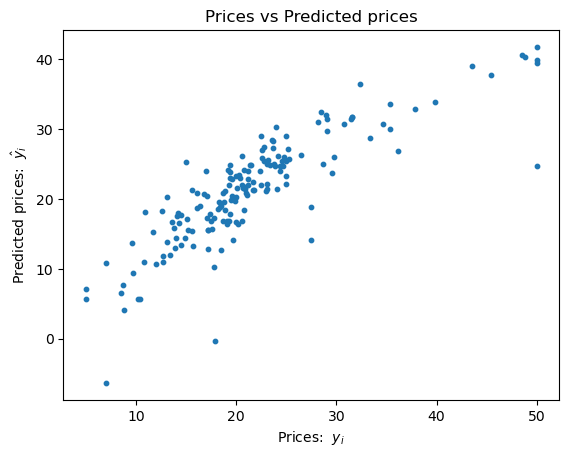

In [39]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices:  $y_i$")
plt.ylabel("Predicted prices:  $\hat{y}_i$")
plt.title("Prices vs Predicted prices")

## Linear Regression with Ridge & Lasso regression

In [40]:
from sklearn.linear_model import Lasso, Ridge

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [43]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [44]:
y_hat = ridge.predict(X_test)
y_true = y_test

In [45]:
# RMSE
np.sqrt(((y_hat-y_true)**2).sum()/len(y_true))

4.579058484791169

In [46]:
mse = mean_squared_error(y_true, y_pred=y_hat)
r2score = r2_score(y_true, y_pred=y_hat)

mse, r2score

(20.967776607137992, 0.7229361801908383)

Text(0.5, 1.0, 'Prices vs Predicted prices')

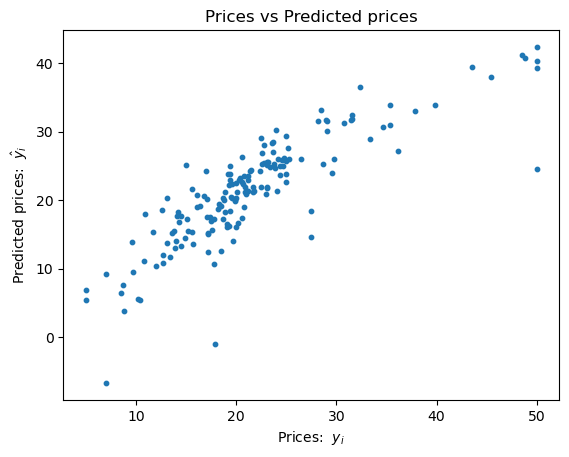

In [47]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices:  $y_i$")
plt.ylabel("Predicted prices:  $\hat{y}_i$")
plt.title("Prices vs Predicted prices")

#### 정리

- 특별한 경우가 없으면 SGD 보다 lasso나 Ridge를 쓰는 것이 더 좋은 성능을 낸다
- 만약 SGD를 써야 하면 반드시 Scaling을 하고 쓴다